# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd 

from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split as tts

In [2]:
%pip install scikit-learn=='1.1.3'

Note: you may need to restart the kernel to use updated packages.


## Regression Model Evaluation

In [3]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [7]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [8]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LinearRegression as LinReg

lreg = LinReg()
lreg.fit(X_train, y_train)

lreg

LinearRegression()

In [9]:
yp_test = lreg.predict(X_test)
yp_train = lreg.predict(X_train)

yp_test[:5], yp_train[:5]

(array([[19.21663167],
        [24.15711303],
        [18.16308972],
        [29.4544624 ],
        [21.46099907]]),
 array([[15.36730139],
        [20.62273138],
        [20.10563934],
        [34.49666889],
        [24.63183504]]))

## 3. Calculate and print R-squared for both the training and the testing set.

In [10]:
from sklearn.metrics import r2_score as r2

r2test = r2(y_test, yp_test)
r2train = r2(y_train, yp_train)

r2test, r2train

(0.7336750390819559, 0.7364415269592937)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [11]:
from sklearn.metrics import mean_squared_error as mse 

mse_test = mse(y_test, yp_test)
mse_train = mse(y_train, yp_train)

mse_test, mse_train

(25.20656296656677, 21.470570103904073)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [12]:
from sklearn.metrics import mean_absolute_error as mae

mae_test = mae(y_test, yp_test)
mae_train = mae(y_train, yp_train)

mae_test, mae_train

(3.674116285108598, 3.2522237905409797)

In [13]:
# Obviously, the errors are always smaller when predicting over the data used for the training

## Classification Model Evaluation

In [14]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [15]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [16]:
X = data.drop(columns = 'class')
y = data['class']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [17]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LogisticRegression as LogReg

logreg = LogReg()
logreg.fit(X_train, y_train)

logreg

LogisticRegression()

In [18]:
yp_test = logreg.predict(X_test)
yp_train = logreg.predict(X_train)

yp_test[:5], yp_train[:5]

(array([1, 2, 1, 1, 2]), array([1, 1, 1, 0, 0]))

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [19]:
logreg.score(X_test,y_test), logreg.score(X_train,y_train)

(0.9666666666666667, 0.975)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [20]:
from sklearn.metrics import balanced_accuracy_score as bacc

yp_test = logreg.predict(X_test)
yp_train = logreg.predict(X_train)

print('Test balanced accuracy score:', bacc(y_test,yp_test))
print('Train balanced accuracy score:', bacc(y_train,yp_train))

Test balanced accuracy score: 0.9583333333333334
Train balanced accuracy score: 0.9748677248677248


## 10. Calculate and print the precision score for both the training and the testing set.

In [21]:
from sklearn.metrics import precision_score as prec

df = pd.DataFrame([prec(y_test,yp_test, average = None),prec(y_train,yp_train, average = None)])

# 'average = None' will show the score for each cathegory

df.index = ['Test','Train']

df

,0,1,2
Test,1.0,1.00000,0.933333
Train,1.0,0.97561,0.945946


## 11. Calculate and print the recall score for both the training and the testing set.

In [22]:
from sklearn.metrics import recall_score as rec

df = pd.DataFrame([rec(y_test, yp_test, average = None),rec(y_train, yp_train, average = None)])

df.index = ['Test','Train']

df

,0,1,2
Test,1.0,0.875000,1.000000
Train,1.0,0.952381,0.972222


## 12. Calculate and print the F1 score for both the training and the testing set.

In [23]:
from sklearn.metrics import f1_score as f1

df = pd.DataFrame([f1(y_test, yp_test, average = None),f1(y_train, yp_train, average = None)])

df.index = ['Test','Train']

df

,0,1,2
Test,1.0,0.933333,0.965517
Train,1.0,0.963855,0.958904


## 13. Generate confusion matrices for both the training and the testing set.

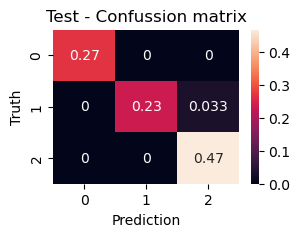

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm

plt.figure(figsize=(3, 2))
ax = sns.heatmap(cm(y_test, yp_test)/cm(y_test, yp_test).sum(), annot = True)

plt.title('Test - Confussion matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

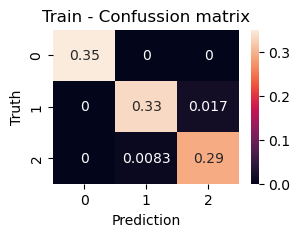

In [28]:
cm(y_train, yp_train)

plt.figure(figsize=(3, 2))

ax = sns.heatmap(cm(y_train,yp_train)/cm(y_train,yp_train).sum(), annot = True)

plt.title('Train - Confussion matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.